# Baseline Computation

In [9]:
import numpy as np
import os
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
datafile = os.path.join("../TrainData/activationMatrices.npy")
labelfile = os.path.join("../TrainData/connectivityMatrices.npy")

In [7]:
dataset = np.load(datafile)
connlabels = np.load(labelfile)

print(dataset.shape, connlabels.shape)

(500, 1000, 10) (500, 10, 10)


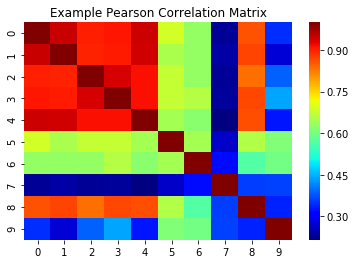

In [24]:
numsamps, T, N = dataset.shape

baseline_diffs = []
for i in range(numsamps):
    # get data NxT
    data = dataset[i,...].T
    # get label NxN
    trueconnlabel = connlabels[i,...]
    
    # compute pairwise
    corr = np.corrcoef(data)
    
    if i == 0:
        ax = sns.heatmap(corr, cmap='jet')
        ax.set_title("Example Pearson Correlation Matrix")
    
    matdiff = np.linalg.norm(corr-trueconnlabel)
    baseline_diffs.append(matdiff)

Text(0.5, 0.98, 'Baseline L2 Norm Distance From True Conn Label')

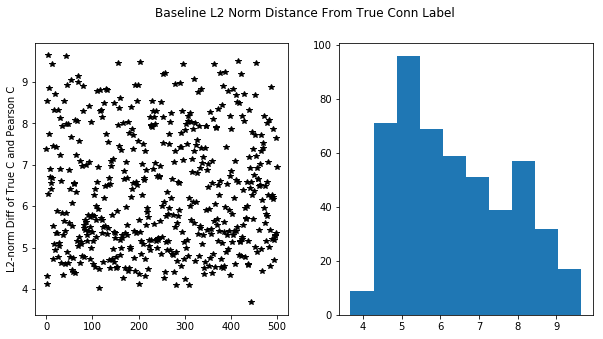

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs = axs.flatten()
ax = axs[0]
ax.plot(baseline_diffs, 'k*')
ax.set_ylabel("L2-norm Diff of True C and Pearson C")
ax = axs[1]
ax.hist(baseline_diffs)
fig.suptitle("Baseline L2 Norm Distance From True Conn Label")
# fig.tight_layout()